# Trânsito de Vênus de 5 a 6 de junho de 2012
_Imagens da sonda SDO/AIA (Atmospheric Imaging Assembly) no comprimento de onda de 4500 Å (visível) ou 1600 Å/1700 Å (UV), que mostram bem o disco solar e o planeta escuro passando na frente._

Dependências: sunpy, matplotlib, astropy, numpy.

O canal de 1700 Å é uma boa escolha para esse evento; 4500 Å está disponível em algumas bases, mas menos comum.

O método np.nansum ignora valores NaN que podem estar na borda.

Se quiser usar toda a imagem, substitua submap por m.data.

### Registro de email para download das imagens 
Seguir tutorial em: https://docs.sunpy.org/en/stable/generated/api/sunpy.net.jsoc.JSOCClient.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sunpy.net import Fido, attrs as a
from sunpy.map import Map
from sunpy.time import parse_time
from astropy.time import Time
import astropy.units as u

In [3]:
from sunpy.net import jsoc

client = jsoc.JSOCClient()

# Se você já registrou um e-mail no JSOC
jsoc_email = "biaduque7@hotmail.com"  # Substitua pelo seu

# 1. Buscar dados do SDO/AIA durante o trânsito de Vênus (5-6 de junho de 2012)
start_time = "2012-06-05 20:00"
end_time = "2012-06-06 06:30"
wavelength = 171 * u.angstrom  # Visível, pode trocar por 4500 se quiser
series = 'aia.lev1_euv_12s'

# Procura os dados via client JSOC
result = client.search(
    a.Time(start_time, end_time),
    jsoc.Series(series),
    a.Instrument.aia,
    a.Wavelength(wavelength),
    a.Sample(10 * u.minute),
    jsoc.Notify(jsoc_email)
)

print(f"Imagens encontradas: {len(result)}")

# 2. Download (pequeno conjunto para teste)
downloaded = client.fetch(result)  # baixa apenas as 30 primeiras para evitar excesso
files = client.fetch(result[:5], email=jsoc_email)

print(files)

Imagens encontradas: 55
Export request pending. [id=JSOC_20250531_001872, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20250531_001872, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20250531_001872, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20250531_001872, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20250531_001872, status=1]
Waiting for 5 seconds...
110 URLs found for download. Full request totalling 532MB


Files Downloaded: 100%|██████████| 110/110 [05:13<00:00,  2.85s/file]


Export request pending. [id=JSOC_20250531_001872, status=2]
Waiting for 0 seconds...
110 URLs found for download. Full request totalling 532MB


Files Downloaded: 100%|██████████| 110/110 [02:11<00:00,  1.20s/file]

['/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T200010Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T200010Z.171.spikes.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T201013Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T201013Z.171.spikes.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T202013Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T202013Z.171.spikes.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T204013Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T204013Z.171.spikes.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T205013Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T205013Z.171.spikes.fits', '/Users/beatrizduque/sunpy/data/aia.lev1_euv_12s.2012-06-05T210013Z.171.image_lev1.fits', '/Users/beatrizduque/sunpy/da

In [9]:
from sunpy.coordinates import frames
from astropy.coordinates import SkyCoord

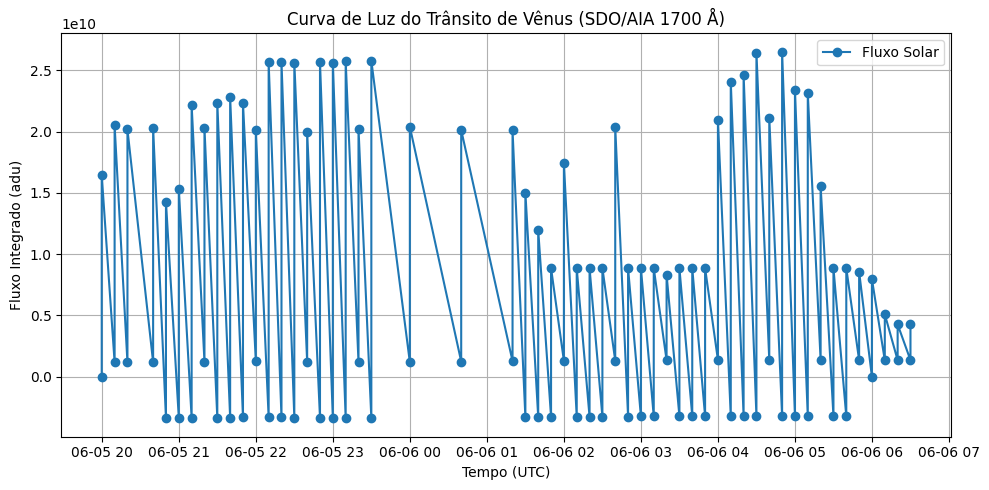

In [10]:
# 3. Processar cada imagem e calcular o brilho total (soma dos pixels)
times = []
fluxes = []

for filepath in files:
    m = Map(filepath)
    
    # Opcional: recortar o disco solar para excluir bordas ou artefatos
    bottom_left = SkyCoord(
    m.center.Tx - 500*u.arcsec,
    m.center.Ty - 500*u.arcsec,
    frame=m.coordinate_frame
    )
    top_right = SkyCoord(
        m.center.Tx + 500*u.arcsec,
        m.center.Ty + 500*u.arcsec,
        frame=m.coordinate_frame
    )

    submap = m.submap(bottom_left=bottom_left, top_right=top_right)
    
    # Brilho total = soma de intensidades
    total_flux = np.nansum(submap.data)
    fluxes.append(total_flux)
    times.append(parse_time(m.date))

# 4. Plotar curva de luz
plt.figure(figsize=(10, 5))
plt.plot_date(Time(times).plot_date, fluxes, '-o', label='Fluxo Solar')
plt.title("Curva de Luz do Trânsito de Vênus (SDO/AIA 1700 Å)")
plt.xlabel("Tempo (UTC)")
plt.ylabel("Fluxo Integrado (adu)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Etapa pós download

In [ ]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

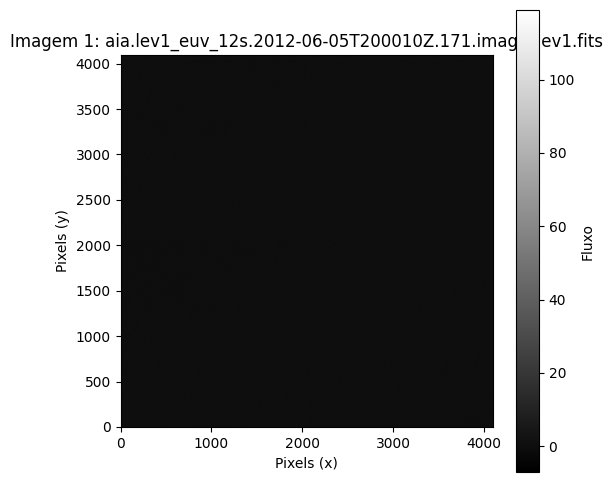

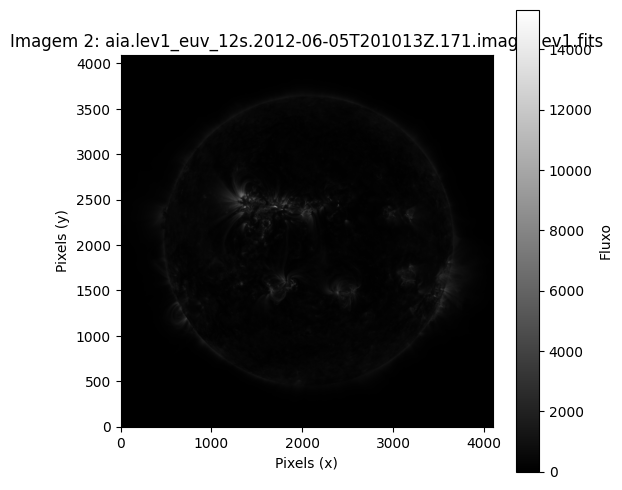

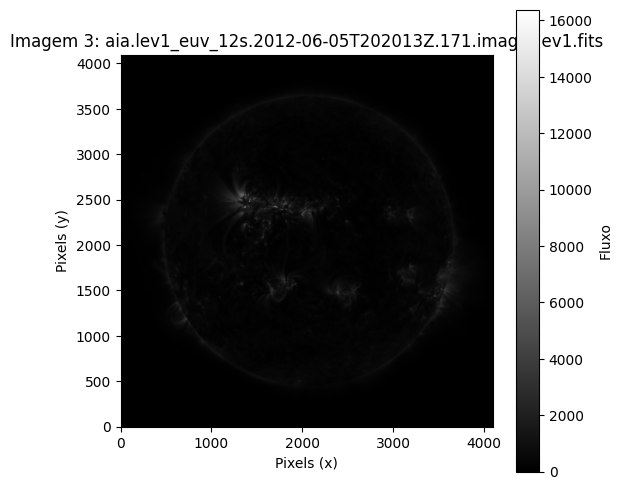

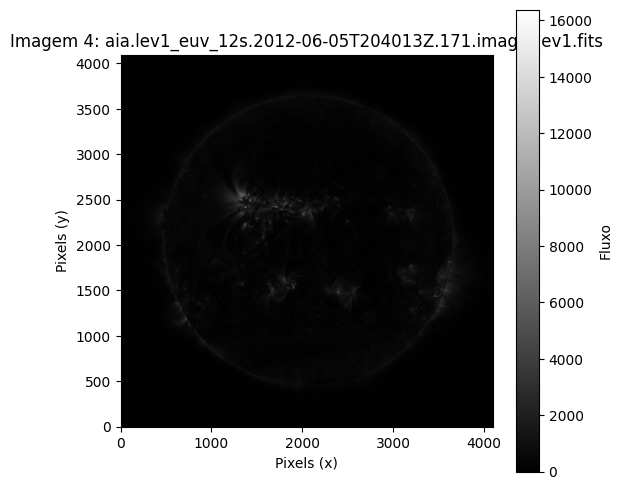

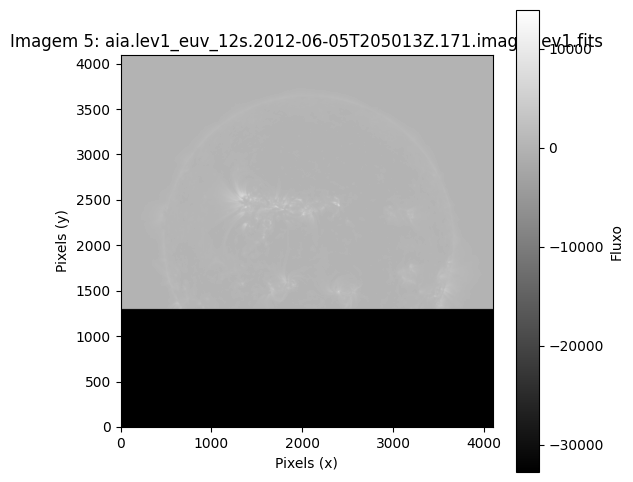

In [30]:
# Caminho da pasta com os arquivos .fits
caminho_pasta = '/Users/beatrizduque/sunpy/data'  # exemplo: "./imagens_venus_sun"

arquivos_fits = sorted([
    f for f in os.listdir(caminho_pasta)
    if f.endswith('.fits') and not f.endswith('.spikes.fits')
])

# Visualizar as primeiras N imagens
N = 5

for i, nome_arquivo in enumerate(arquivos_fits[:N]):
    caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)
    
    with fits.open(caminho_arquivo) as hdul:
        imagem = hdul[1].data
        header = hdul[1].header

    try:
        imagem_array = np.array(imagem, dtype=np.float32)
        imagem_normalizada = np.nan_to_num(imagem_array)

        plt.figure(figsize=(6, 6))
        plt.imshow(imagem_normalizada, cmap='gray', origin='lower')
        plt.title(f"Imagem {i+1}: {nome_arquivo}")
        plt.colorbar(label='Fluxo')
        plt.xlabel('Pixels (x)')
        plt.ylabel('Pixels (y)')
        plt.show()
    except Exception as e:
        print(f"Erro ao processar {nome_arquivo}: {e}")


Ignorando aia.lev1_euv_12s.2012-06-05T200010Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T205013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T210013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T211013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T213013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T214013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T215013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T221013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T222013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T223013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T225013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.lev1_euv_12s.2012-06-05T230013Z.171.image_lev1.fits (soma negativa)
Ignorando aia.le

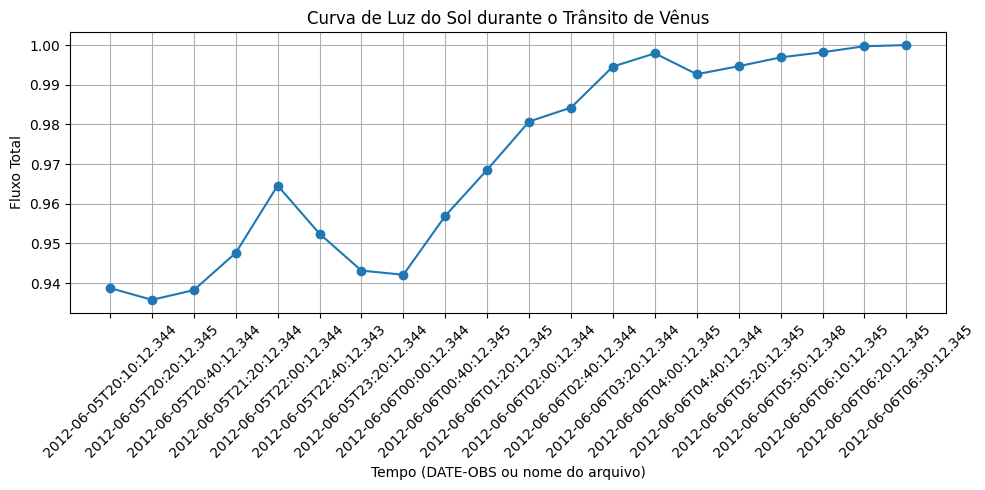

In [29]:
fluxos = []
tempos = []

for nome_arquivo in arquivos_fits:
    caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

    with fits.open(caminho_arquivo) as hdul:
        imagem = hdul[1].data
        header = hdul[1].header

        # Ignora se a imagem estiver vazia ou com soma negativa
        if imagem is None:
            print(f"Ignorando {nome_arquivo} (imagem vazia)")
            continue
        if np.sum(imagem) < 0:
            print(f"Ignorando {nome_arquivo} (soma negativa)")
            continue        

    # Calcular o fluxo total (soma dos valores dos pixels)
    fluxo_total = np.nansum(imagem)
    fluxos.append(fluxo_total)

    # Capturar o tempo a partir do header (ex: DATE-OBS ou TIME)
    tempo = header.get('DATE-OBS', nome_arquivo)
    tempos.append(tempo)

fluxos = np.array(fluxos)
fluxos_normalizados = fluxos / np.max(fluxos)

# Plotar curva de luz
plt.figure(figsize=(10, 5))
plt.plot(tempos, fluxos_normalizados, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Tempo (DATE-OBS ou nome do arquivo)')
plt.ylabel('Fluxo Total')
plt.title('Curva de Luz do Sol durante o Trânsito de Vênus')
plt.grid(True)
plt.tight_layout()
plt.show()
